In [1]:
import numpy as np
import pandas as pd

In [2]:
vehicle_df=pd.read_csv('vehicle.csv')

1. Step: Data pre-processing - Understand the data and treat missing values (Use box plot), outliers 

In [3]:
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
vehicle_df.shape

(846, 19)

In [5]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [6]:
# Columns --- circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2 seem to have some missing values             

In [7]:
vehicle_df.isna().any()

compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
class                          False
dtype: bool

In [8]:
numeric_cols = vehicle_df.drop('class', axis=1) # getting all the numerical columns

In [9]:
numeric_cols = numeric_cols.apply(lambda x: x.fillna(x.median()),axis=0) # replacing the na values with median

In [10]:
vehicle = numeric_cols.join(vehicle_df['class'])

In [11]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

In [12]:
# Missing values have been treated

In [13]:
# Outlier detection

In [14]:
vehicle.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [15]:
vehicle.boxplot(column=['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],figsize =(40,20))

In [16]:
# columns--compactness, circularity, distance_circularity ,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_radius_of_gyration,skewness_about.2, hollows_ratio
# don't have outliers

In [17]:
# outlier treatment

In [18]:
q1 = vehicle.quantile(0.25)
q3 = vehicle.quantile(0.75)
iqr = q3 - q1
print(iqr)

compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
dtype: float64


In [19]:
lower_bound = q1 -(1.5 * iqr)

In [20]:
upper_bound = q3 +(1.5 * iqr)

In [21]:
print((vehicle<lower_bound)|(vehicle>upper_bound))
#The data point which have False means those values are valid whereas True indicates presence of an outlier.

     circularity  class  compactness  distance_circularity  elongatedness  \
0          False  False        False                 False          False   
1          False  False        False                 False          False   
2          False  False        False                 False          False   
3          False  False        False                 False          False   
4          False  False        False                 False          False   
5          False  False        False                 False          False   
6          False  False        False                 False          False   
7          False  False        False                 False          False   
8          False  False        False                 False          False   
9          False  False        False                 False          False   
10         False  False        False                 False          False   
11         False  False        False                 False          False   

In [22]:
outliers_vehicle=vehicle[((vehicle<lower_bound)|(vehicle>upper_bound)).any(axis=1)] 

In [23]:
outliers_vehicle

compactness  circularity  distance_circularity  radius_ratio  \
4             85         44.0                  70.0         205.0   
37            90         48.0                  86.0         306.0   
44           119         54.0                 106.0         220.0   
47            85         42.0                  66.0         122.0   
79            89         44.0                  68.0         113.0   
85           110         58.0                 106.0         180.0   
100           82         45.0                  66.0         252.0   
113           88         35.0                  50.0         121.0   
123           90         36.0                  57.0         130.0   
127           85         41.0                  66.0         155.0   
132           97         42.0                 101.0         186.0   
135           89         47.0                  83.0         322.0   
190           97         48.0                  94.0         198.0   
230           85         35.0                  47.0         110.0   
291           89         45.0                  81.0         246.0   
346          117         52.0                 110.0         228.0   
381          106         54.0                 100.0         227.0   
388           94         47.0                  85.0         333.0   
391           91         38.0                  70.0         160.0   
400          107         53.0                 108.0         213.0   
498           88         36.0                  53.0         113.0   
505          115         53.0                 100.0         205.0   
516           92         42.0                  75.0         172.0   
523           90         43.0                  81.0         231.0   
544           88         43.0                  70.0         177.0   
623          106         52.0                 108.0         207.0   
655           86         35.0                  44.0         110.0   
706           82         43.0                  70.0         250.0   
761          115         51.0                 100.0         201.0   
796           85         38.0                  63.0         130.0   
797          111         53.0                 108.0         211.0   
815           81         45.0                  68.0         154.0   
835          111         58.0                 105.0         183.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                   103.0                       52          149.0   
37                  126.0                       49          153.0   
44                   65.0                       12          213.0   
47                   54.0                        6          148.0   
79                   50.0                        7          150.0   
85                   51.0                        6          261.0   
100                 126.0                       52          148.0   
113                  58.0                        5          114.0   
123                  57.0                        6          121.0   
127                  65.0                       22          149.0   
132                  59.0                        9          186.0   
135                 133.0                       48          158.0   
190                  63.0                        9          181.0   
230                  55.0                        3          117.0   
291                 102.0                       43          155.0   
346                  65.0                       12          212.0   
381                  67.0                        4          250.0   
388                 138.0                       49          155.0   
391                  66.0                       25          140.0   
400                  64.0                       12          206.0   
498                  57.0                        3          118.0   
505                  64.0                       11          220.0   
516                  60.0                        8          147.0   
52

In [24]:
outliers_vehicle.shape # 33 outlier rows are present

(33, 19)

In [25]:
#vehicle_without_outliers
vehicle_Wo=vehicle[~((vehicle<lower_bound)|(vehicle>upper_bound)).any(axis=1)]    # the tidle operator(~) is the bitwise not. Whatever result comes from the dataframe ~ tidle is inversing boolean mask - Falses to Trues and Trues to Falses i.e it is inversing the result of outcome

In [26]:
vehicle_Wo

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
5            107         44.0                 106.0         172.0   
6             97         43.0                  73.0         173.0   
7             90         43.0                  66.0         157.0   
8             86         34.0                  62.0         140.0   
9             93         44.0                  98.0         167.0   
10            86         36.0                  70.0         143.0   
11            90         34.0                  66.0         136.0   
12            88         46.0                  74.0         171.0   
13            89         42.0                  85.0         144.0   
14            94         49.0                  79.0         203.0   
15            96         55.0                 103.0         201.0   
16            89         36.0                  51.0         109.0   
17            99         41.0                  77.0         197.0   
18           104         54.0                 100.0         186.0   
19           101         56.0                 100.0         215.0   
20            84         47.0                  75.0         153.0   
21            84         37.0                  53.0         121.0   
22            94         43.0                  64.0         173.0   
23            87         39.0                  70.0         148.0   
24            99         53.0                 105.0         219.0   
25            85         45.0                  80.0         154.0   
26            83         36.0                  54.0         119.0   
27           107         54.0                  98.0         203.0   
28           102         45.0                  85.0         193.0   
29            80         38.0                  63.0         129.0   
30            89         43.0                  85.0         160.0   
..           ...          ...                   ...           ...   
814           85         43.0                  66.0         123.0   
816           90         48.0                  85.0         157.0   
817          104         53.0                 108.0         204.0   
818           95         43.0                  96.0         202.0   
819           93         42.0                  98.0         192.0   
820           87         38.0                  71.0         123.0   
821          104         56.0                  96.0         231.0   
822           95         41.0                  82.0         170.0   
823          105         54.0                 105.0         213.0   
824          106         55.0                  96.0         196.0   
825           86         39.0                  84.0         149.0   
826           95         49.0                  92.0         193.0   
827           99         57.0                 100.0         177.0   
828           89         42.0                  66.0         125.0   
829           95         49.0                  82.0         139.0   
830           97         37.0                  70.0         173.0   
831          100         47.0                  70.0         185.0   
832          108         49.0                 109.0         204.0   
833           92         46.0                  83.0         154.0   
834           82         36.0                  51.0         114.0   
836           87         45.0                  66.0         139.0   
837           94         46.0                  77.0         169.0   
838           95         43.0                  76.0         142.0   
839           90         44.0                  72.0         157.0   
840           93         34.0                  66.0         140.0   
841           93         39.0                  87.0         183.0   
842

In [27]:
vehicle.shape

(846, 19)

In [28]:
vehicle_Wo.shape

(813, 19)

In [29]:
# 33 rows have been removed

In [30]:
vehicle_Wo.info() # datset with missing values and outlier treatment

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

2. Step: Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)

In [31]:
# 1.  correlation
# 2.  pairplot
# 3.  heat map
# 4.  feature importance

In [32]:
import seaborn as sns

In [33]:
#correlation
vehicle_Wo.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.679327              0.786824   
circularity                     0.679327     1.000000              0.786778   
distance_circularity            0.786824     0.786778              1.000000   
radius_ratio                    0.745988     0.640936              0.808331   
pr.axis_aspect_ratio            0.200634     0.206156              0.245454   
max.length_aspect_ratio         0.497660     0.564159              0.668833   
scatter_ratio                   0.810842     0.843765              0.905577   
elongatedness                  -0.788560    -0.815764             -0.908687   
pr.axis_rectangularity          0.811866     0.840162              0.894783   
max.length_rectangularity       0.674166     0.961220              0.768689   
scaled_variance                 0.791464     0.802762              0.884133   
scaled_variance.1               0.812494     0.832483              0.888193   
scaled_radius_of_gyration       0.577688     0.925142              0.702483   
scaled_radius_of_gyration.1    -0.253678     0.066697             -0.237938   
skewness_about                  0.200640     0.140391              0.098813   
skewness_about.1                0.161106    -0.014342              0.263508   
skewness_about.2                0.295414    -0.116832              0.128912   
hollows_ratio                   0.364160     0.039182              0.321655   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.745988              0.200634   
circularity                      0.640936              0.206156   
distance_circularity             0.808331              0.245454   
radius_ratio                     1.000000              0.666209   
pr.axis_aspect_ratio             0.666209              1.000000   
max.length_aspect_ratio          0.460691              0.138261   
scatter_ratio                    0.789523              0.199971   
elongatedness                   -0.844025             -0.301918   
pr.axis_rectangularity           0.763829              0.169752   
max.length_rectangularity        0.576791              0.145857   
scaled_variance                  0.792802              0.214810   
scaled_variance.1                0.776142              0.186297   
scaled_radius_of_gyration        0.550545              0.153509   
scaled_radius_of_gyration.1     -0.403176             -0.325102   
skewness_about                   0.040306             -0.051539   
skewness_about.1                 0.187190             -0.028583   
skewness_about.2                 0.418354              0.406292   
hollows_ratio                    0.504693              0.419801   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.497660       0.810842   
circularity                                 0.564159       0.843765   
distance_circularity                        0.668833       0.905577   
radius_ratio                                0.460691       0.789523   
pr.axis_aspect_ratio                        0.138261       0.199971   
max.length_aspect_ratio                     1.000000       0.497466   
scatter_ratio                               0.497466       1.000000   
elongatedness                              -0.502377      -0.972340   
pr.axis_rectangularity                      0.497233       0.989441   
max.length_rectangularity                   0.647844       0.807070   
scaled_variance                             0.411562       0.977548   
scaled_variance.1                           0.457892       0.992982   
scaled_radius_of_gyration                   0.404288       0.794915   
scaled_radius_of_gyration.1                -0.332752       0.002444   
skewness_about                              0.084005       0.063471   
skewness_about.1                            0.140972       0.214182   
skewness_about.2                            0.

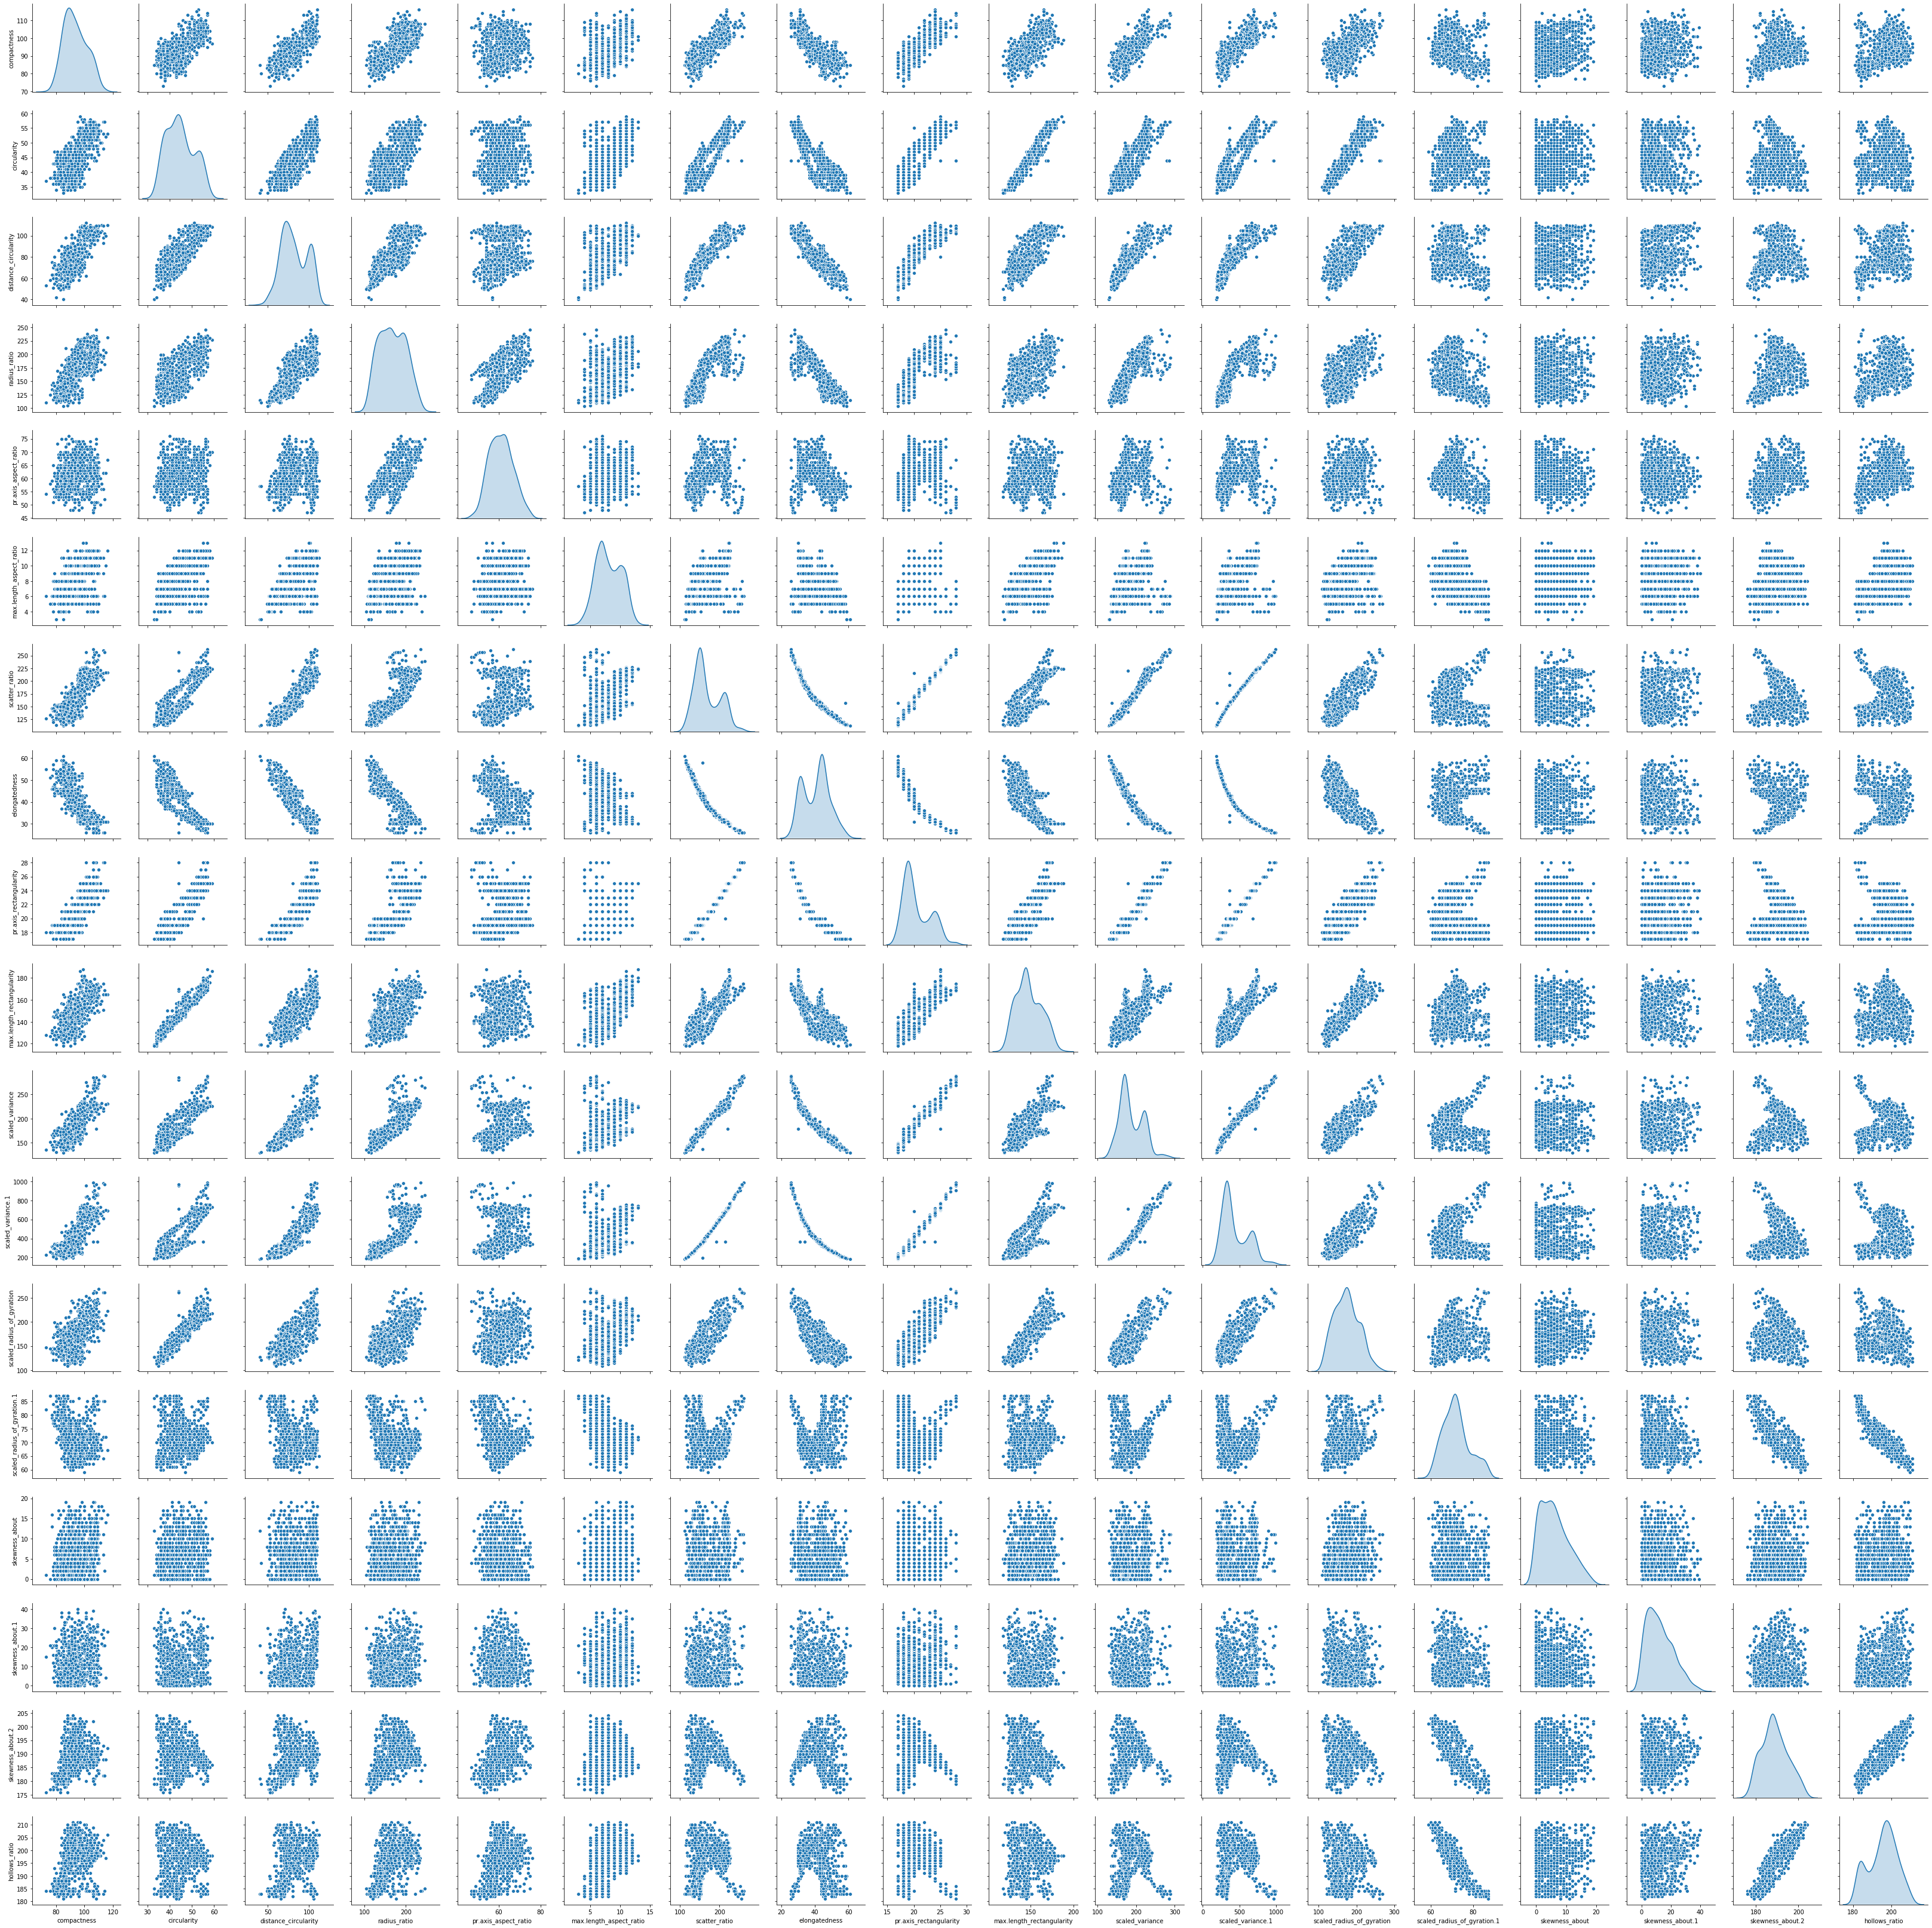

In [34]:
#pairplot
sns.pairplot(vehicle_Wo, diag_kind='kde')

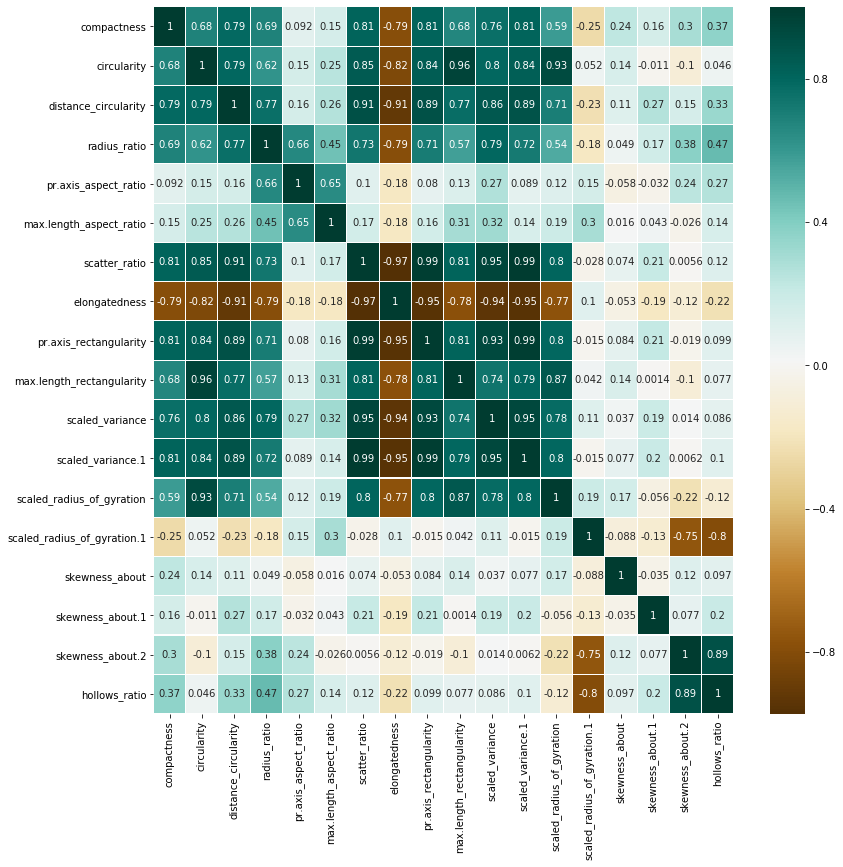

In [35]:
# Visualize the correlation among independent features
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(13,13))
sns.heatmap(vehicle.corr(), annot=True, linewidths=0.1, cmap='BrBG')

In [36]:
#OBSERVATIONS
# Very few scatter plots like for skewness_about and skewness_about.1  are of cloud in structure and most of the scatter plots are rugby shaped.
# In the heatmap , the maximum part of it is dark shaded, which means the correlation co-efficient is higher for them.
# This means most of the features are highly co-related with each other either positively or negatively. 
# This explains there is a higher degree of multi-colinearity present in the dataset.
# Only the plots for skewness_about and skewness_about.1 is showing cloud structure across all other features. 
# The heat map for these two features also have all light shades across. Hence these 2 features have less colinearity with other features.

In [37]:
# Divide the dataset into Input features and Target variables
X = vehicle_Wo.drop('class', axis=1)
y = vehicle_Wo['class']

D:\Python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


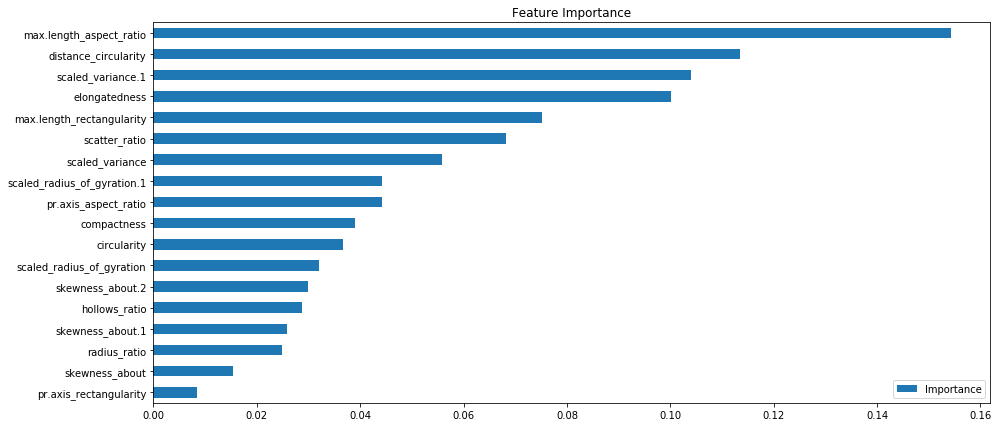

In [38]:
# Feature Importance plot using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X, y)
pd.DataFrame(rf.feature_importances_, index = vehicle.columns[:-1], 
             columns=['Importance']).sort_values('Importance').plot(kind='barh', figsize=(15,7), title='Feature Importance')

In [39]:
# From the plot above it is shown that skewness_about and skewness_about.1 are more important than few other features but lets include all the features as we will perform dimension redution with the help of PCA

3. Step: 3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()
X_train_std =  sc.fit_transform(X)          
train_cov_matrix = np.cov(X_train_std.T)
print('Covariance Matrix \n%s', train_cov_matrix)

Covariance Matrix 
%s [[ 1.00123153e+00  6.80164027e-01  7.87792814e-01  7.46906930e-01
   2.00881439e-01  4.98273207e-01  8.11840645e-01 -7.89531434e-01
   8.12866245e-01  6.74996601e-01  7.92438680e-01  8.13494150e-01
   5.78399755e-01 -2.53990635e-01  2.00887113e-01  1.61304844e-01
   2.95777412e-01  3.64608943e-01]
 [ 6.80164027e-01  1.00123153e+00  7.87747162e-01  6.41725205e-01
   2.06409699e-01  5.64854067e-01  8.44804611e-01 -8.16768295e-01
   8.41196310e-01  9.62404205e-01  8.03750964e-01  8.33508154e-01
   9.26281607e-01  6.67790806e-02  1.40563881e-01 -1.43598307e-02
  -1.16976151e-01  3.92302597e-02]
 [ 7.87792814e-01  7.87747162e-01  1.00123153e+00  8.09326627e-01
   2.45756551e-01  6.69657073e-01  9.06692225e-01 -9.09806087e-01
   8.95884623e-01  7.69635504e-01  8.85221631e-01  8.89286924e-01
   7.03348558e-01 -2.38231284e-01  9.89345733e-02  2.63832735e-01
   1.29070982e-01  3.22051625e-01]
 [ 7.46906930e-01  6.41725205e-01  8.09326627e-01  1.00123153e+00
   6.67029240e-

In [41]:
eigenvalues, eigenvectors = np.linalg.eig(train_cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-2.72251046e-01 -8.97284818e-02  2.26045073e-02  1.30419032e-01
  -1.52324139e-01  2.58374578e-01 -1.88794221e-01 -7.71578238e-01
  -3.61784776e-01 -1.25233628e-01  2.92009470e-02  7.62442008e-04
  -1.06680587e-02  1.05983722e-02 -1.01407495e-01 -1.46326861e-01
  -3.81638532e-03  3.32992130e-03]
 [-2.85370045e-01  1.33173937e-01  2.10809943e-01 -2.06785531e-02
   1.39022591e-01 -6.88979940e-02  3.90871235e-01 -6.60528436e-02
  -4.62957583e-02  2.40262612e-01  7.29503235e-02  1.93799916e-01
  -7.74670931e-03 -8.71766559e-02 -3.11337823e-01  1.96463651e-01
  -2.96230720e-01  5.83996136e-01]
 [-3.01486231e-01 -4.40259591e-02 -7.08780817e-02  1.07425217e-01
   8.07335409e-02 -2.04800896e-02 -1.76384547e-01  2.98693883e-01
  -2.64499195e-01 -9.42971834e-02  7.78755026e-01 -2.32649049e-01
   1.11905744e-02  2.28724292e-02  5.89166755e-02  5.33931974e-02
   9.72735293e-02  8.64160083e-02]
 [-2.72594510e-01 -2.04232234e-01 -4.02139629e-02 -2.52957341e-01
  -1.19012554e-01 -

In [42]:
train_eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort()

train_eig_pairs.reverse()
print(train_eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)

[(9.792975698382946, array([-0.27225105, -0.28537005, -0.30148623, -0.27259451, -0.09857976,
       -0.19475579, -0.31051844,  0.30843834, -0.30754849, -0.27630107,
       -0.30274811, -0.30704063, -0.26152049,  0.04363236, -0.0367057 ,
       -0.05885041, -0.03483739, -0.08281362])), (3.3771064398939745, array([-0.08972848,  0.13317394, -0.04402596, -0.20423223, -0.25913686,
       -0.09457563,  0.07233508, -0.01168768,  0.08409153,  0.12583663,
        0.07019986,  0.07793366,  0.20992728,  0.50391445, -0.01456825,
       -0.09339805, -0.50166421, -0.50654656])), (1.208730539635098, array([ 0.02260451,  0.21080994, -0.07087808, -0.04021396,  0.11480523,
        0.13931348, -0.1129247 ,  0.09003305, -0.11106355,  0.21987769,
       -0.14481876, -0.11532395,  0.21362744, -0.06739209,  0.52162344,
       -0.68717064,  0.06220695,  0.04080354])), (1.1365956021766952, array([ 0.13041903, -0.02067855,  0.10742522, -0.25295734, -0.605228  ,
        0.32253141, -0.01005404,  0.07991176,  0.0

In [43]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(train_eigvalues_sorted, reverse=True)]  
cum_var_exp = np.cumsum(var_explained) 


In [44]:
var_explained

[0.5433850121010624,
 0.18738625319078211,
 0.0670690992335451,
 0.0630665319780973,
 0.04973246752319121,
 0.036526856639995706,
 0.017925508978244672,
 0.01259041749437931,
 0.00625572292569287,
 0.004228509472278711,
 0.003431291486373019,
 0.0024548710347960206,
 0.0016641679879297417,
 0.0014855878920008011,
 0.0010794342362778785,
 0.000983188815048011,
 0.0005616200041302543,
 0.00017345900617474113]

In [45]:
Cum_var_exp=cum_var_exp*100

In [46]:
print(Cum_var_exp)

[ 54.33850121  73.07712653  79.78403645  86.09068965  91.0639364
  94.71662207  96.50917296  97.76821471  98.39378701  98.81663795
  99.1597671   99.40525421  99.571671    99.72022979  99.82817322
  99.9264921   99.9826541  100.        ]


In [47]:
# In the above array we see that the first feature explains roughly 54% of the variance within our data set while the first two explain 72.3% and so on.
# If we employ 7 features we capture 96.3% (threshold = 95%) of the variance within the dataset, thus we gain very little by implementing an additional feature .

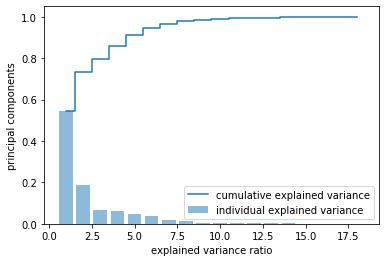

In [48]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label="individual explained variance")
plt.step(range(1,19), cum_var_exp, where='mid', label="cumulative explained variance")
plt.xlabel('explained variance ratio')
plt.ylabel('principal components')
plt.legend(loc='best')
plt.show()

In [49]:
# From Elbow plot we can conclude post PCA, by employing 7 principal components we will able to explain more than 95% of the variance in the dataset.
# Hence, reducing our feature space to 7 dimensions without loosing much of information.

In [50]:
# Creating a new matrix using the seven components
x_projected = PCA(n_components=7).fit_transform(X_train_std)
x_projected.shape

(813, 7)

In [51]:
X_projected=pd.DataFrame(x_projected)

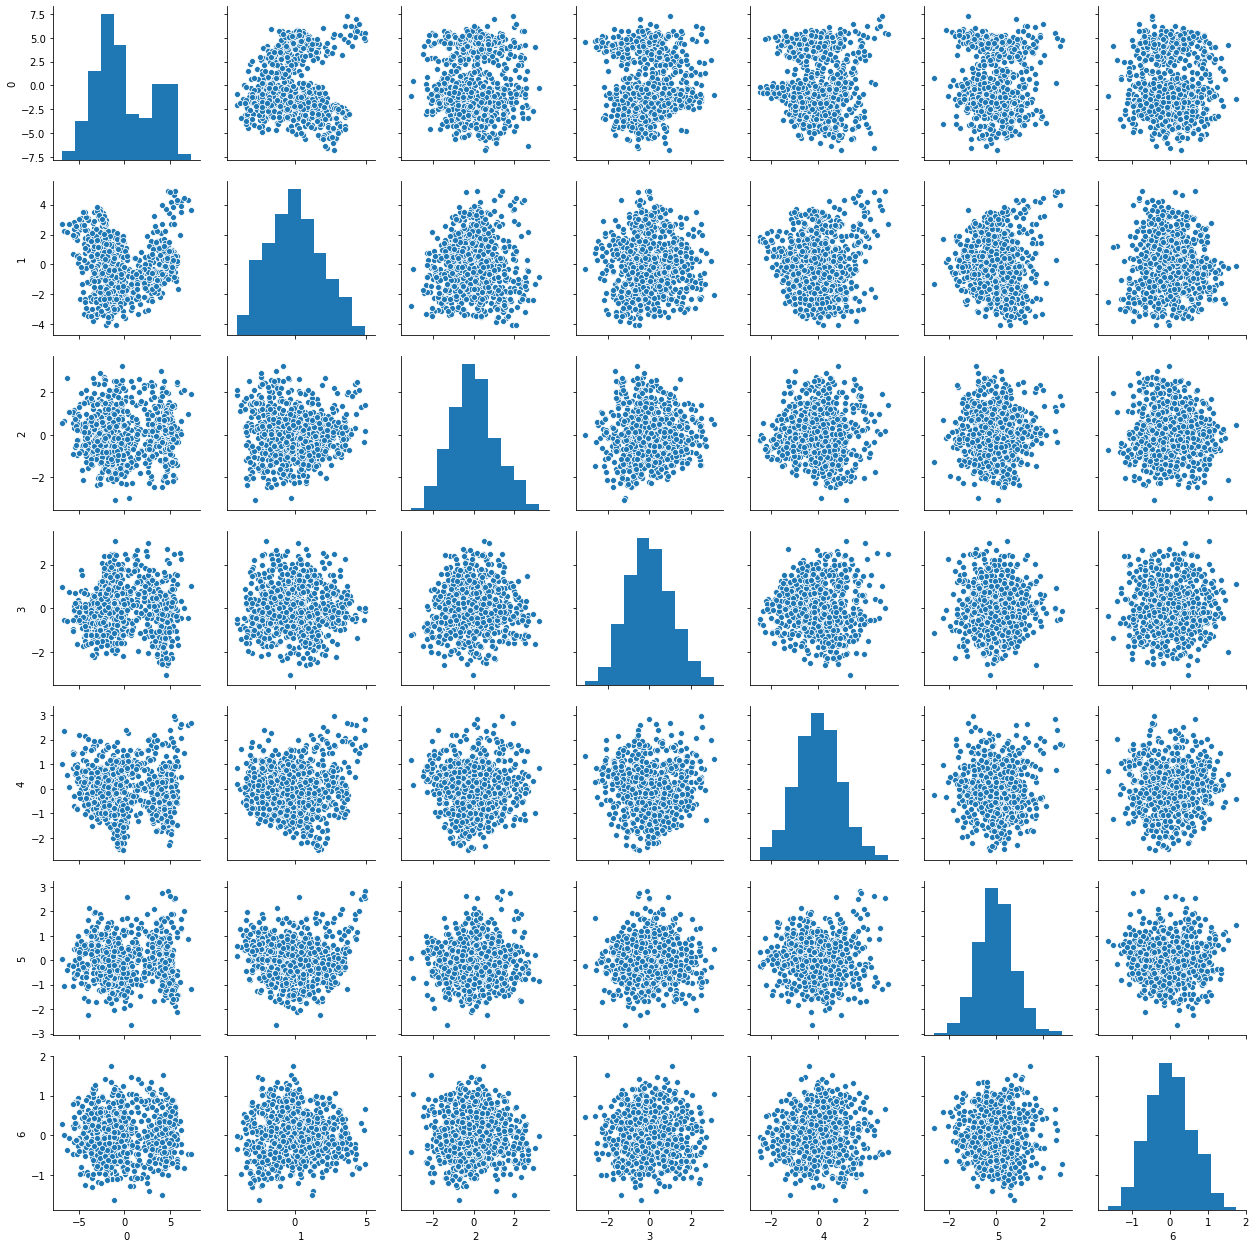

In [52]:
sns.pairplot(X_projected)

4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [54]:
# Divide the projected dataset into train and test split
X_train, X_test, y_train, y_test = train_test_split(X_projected, y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((569, 7), (244, 7), (569,), (244,))

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_recall_curve

In [56]:
classifier_model =SVC()

In [57]:
classifier_model.fit(X_train, y_train)

D:\Python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [58]:
y_pred = classifier_model.predict(X_test)

In [59]:
print('Training accuracy: ', (accuracy_score(y_train, classifier_model.predict(X_train)) * 100))
print('Testing accuracy: ',(accuracy_score(y_test, y_pred) * 100))

Training accuracy:  95.95782073813707
Testing accuracy:  95.90163934426229


In [60]:
print('Confusion matrix:\n', (confusion_matrix(y_test, y_pred)))

Confusion matrix:
 [[ 76   1   1]
 [  2 117   2]
 [  0   4  41]]


In [61]:
 print('Classification report:\n',(classification_report(y_test, y_pred)))

Classification report:
               precision    recall  f1-score   support

         bus       0.97      0.97      0.97        78
         car       0.96      0.97      0.96       121
         van       0.93      0.91      0.92        45

    accuracy                           0.96       244
   macro avg       0.96      0.95      0.95       244
weighted avg       0.96      0.96      0.96       244



In [62]:
import warnings
warnings.filterwarnings("ignore")

In [63]:
k_fold_cv = 10 
grid_params = [
    { 'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear', 'rbf'] }
]
grid = GridSearchCV(classifier_model, param_grid=grid_params, cv=k_fold_cv)
grid.fit(X_projected, y)
print('Best hyper parameter:', grid.best_params_)

Best hyper parameter: {'C': 1, 'kernel': 'rbf'}


In [64]:
from sklearn.model_selection import KFold

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
n_folds=40
seed=1
k_fold=KFold(n_splits=n_folds, random_state=seed)

In [67]:
accuracies=cross_val_score(classifier_model, X_projected,y,cv=k_fold)

In [68]:
accuracies

array([0.9047619 , 0.9047619 , 0.95238095, 0.9047619 , 1.        ,
       0.95238095, 0.95238095, 0.9047619 , 1.        , 0.9047619 ,
       0.9047619 , 1.        , 0.85714286, 0.9       , 1.        ,
       1.        , 0.95      , 0.85      , 1.        , 1.        ,
       1.        , 0.9       , 1.        , 0.95      , 0.95      ,
       0.9       , 1.        , 0.9       , 0.8       , 0.95      ,
       1.        , 1.        , 0.95      , 1.        , 0.95      ,
       0.9       , 0.95      , 0.85      , 0.95      , 0.9       ])

In [69]:
print(accuracies.mean()*100)

94.10714285714286
